In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import mpl_toolkits.mplot3d.axes3d as plt_3d
import datetime as dt
import yfinance as yf
import pandas as pd
import warnings


from Option_function import BSM
from Option_function import Greeks


warnings.filterwarnings('ignore')

# General Instruction



<font size=3 >
In the past two chapters, I have introduced the more basic pricing formula of options, as well as the very important Greek letters in risk management.</font>     


  
<font size=3 >In this chapter, I will introduce some simple applications of the above content and well-known options trading strategies.</font>

<font size=5 >*Task 1 Application of BSM pricing model*</font>

a) Use the BSM model to price the option of AAPL stock, write the Python code that include the pricing date, option expiration date and other related parameters

b) Use the historical data of AAPL from 01/01/2018 to 12/01/2022, calculate the annualized volatility of the stock return. Suppose the close price of AAPL on 01/04/2023 is 126.36, the 6 month LIBOR 5.14%, calculate the price of European Call option with strike price is 130.

c) Assuming that the market issued AAPL European put options on 01/04/2023, the strike price is 120, and the expiration time is 1 year. The 12-month LIBOR on that day is 5.56%. Assuming that there is no dividend in the next year, calculate the European put option price on that day

e) For the European call option and European put option I mentioned above, simulate the option price when the stock price on 01/04/2023 is within the range of 100 to 200. At the same time,calculate the profit when the stock price is between 250 and 500 on the expiration date of the option contract, and visualize them



In [77]:
def European_opt(S0,K,r,T0,T,sigma,Type):
   
    '''
    S0: Asset price
    K: Strik price
    r: Risk-free interest rate
    T0: Pricing day, type: datetime
    T: Expiry day, type: datetime
    sigma: Annualized Volatility of return
    type: 'call' or 'put'
    '''
    
    t=(T-T0).days/365
    d1= (np.log(S0/K)+(r+sigma**2/2)*(t))/(sigma*np.sqrt(t))
    d2=d1-sigma*np.sqrt(t)
    if Type=='call':
        ret=S0*ss.norm.cdf(d1)-K*np.exp(-r*t)*ss.norm.cdf(d2)
    elif Type=='put':
        ret=-S0*ss.norm.cdf(-d1)+K*np.exp(-r*t)*ss.norm.cdf(-d2)
    return ret

## Task 1.a

In [78]:
# Get AAPL data
stock_name='AAPL'
AAPL = yf.Ticker('AAPL')
AAPL = AAPL.history(start = '2018-01-01', end = '2022-12-01')
AAPL = AAPL.rename(columns = {"High": "AAPL High", "Low": "AAPL Low", 
                                      "Open": "AAPL Open", "Close": "AAPL Close", "Volume": "AAPL Volume"})
AAPL.index=pd.to_datetime(AAPL.index)
AAPL

,AAPL Open,AAPL High,AAPL Low,AAPL Close,AAPL Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,40.451276,40.960008,40.237322,40.950497,102223600,0.0,0.0
2018-01-03,41.014678,41.494883,40.879176,40.943359,118071600,0.0,0.0
2018-01-04,41.017058,41.238144,40.907707,41.133545,89738400,0.0,0.0
2018-01-05,41.231010,41.689817,41.138297,41.601860,94640000,0.0,0.0
2018-01-08,41.447350,41.746882,41.347502,41.447350,82271200,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-23,149.449997,151.830002,149.339996,151.070007,58301400,0.0,0.0
2022-11-25,148.309998,148.880005,147.119995,148.110001,35195900,0.0,0.0
2022-11-28,145.139999,146.639999,143.380005,144.220001,69246000,0.0,0.0


In [79]:
log_ret=np.log(AAPL['AAPL Close']).diff().dropna()
annual_vol=np.sqrt(252)*log_ret.std()
print("Annualized volatility is",annual_vol)

Annualized volatility is 0.33552992928759706


## Task 1.b

In [80]:
#Pricing option
S=126.36
K_call=130
T0=dt.datetime(2023,1,4)
T_call=dt.datetime(2023,7,4)
rf_6mon=0.0514
call_price=European_opt(S,K_call,rf_6mon,T0,T_call,annual_vol,'call')
print("Price of European Call is",call_price)

Price of European Call is 11.717282108389142


## Task 1.c

In [81]:
T_put=dt.datetime(2024,1,4)
rf_1year=0.056
K_put=120
put_price=European_opt(S,K_put,rf_1year,T0,T_put,annual_vol,'put')
print("Price of European Put is",put_price)

Price of European Put is 10.335069882372068


## Task 1.d

In [82]:
S_list=np.linspace(100,200,250)
call_ret=np.maximum(S_list-K_call,0)
put_ret=np.maximum(K_put-S_list,0)

call_list=European_opt(S_list,K_call,rf_6mon,T0,T_call,annual_vol,'call')
put_list=European_opt(S_list,K_put,rf_1year,T0,T_put,annual_vol,'put')


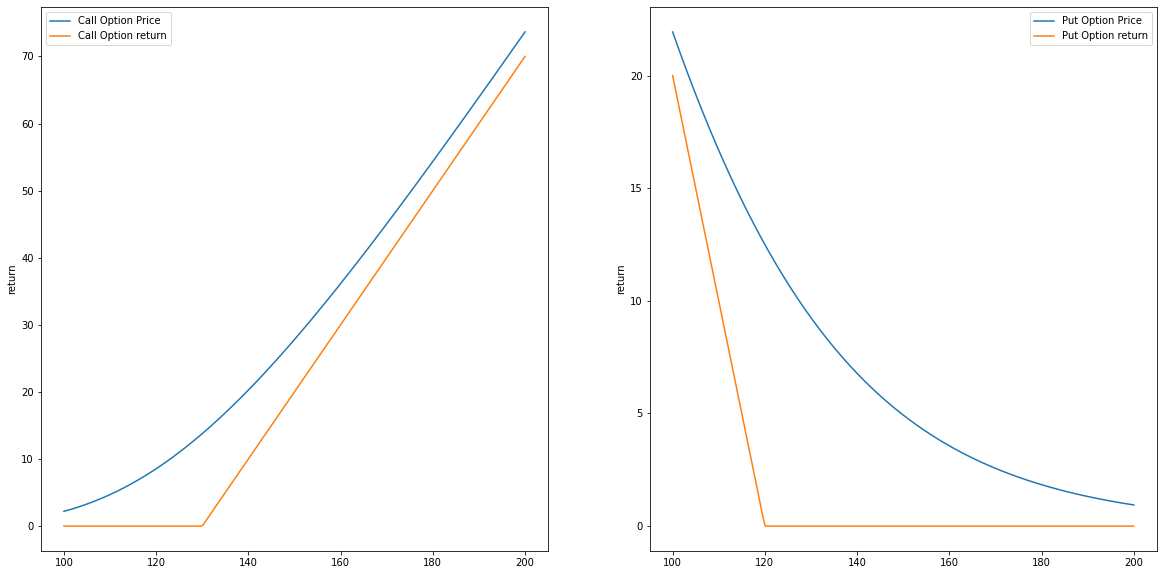

In [83]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(S_list,call_list,label='Call Option Price')
plt.plot(S_list,call_ret,label='Call Option return')
plt.ylabel('return')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(S_list,put_list,label='Put Option Price')
plt.plot(S_list,put_ret,label='Put Option return')
plt.ylabel('return')
plt.legend()

<font size=5 >*Task 2. Application of Greeks*</font>

a) According to the formula for option Greeks,write the Python code to calculate the Greeks of option

b) Use the historical data of TSLA from 01/01/2018 to 01/10/2023, calculate the annualized volatility of the stock return. 

c) Assuming that the company bought a call option with a strike price of 130 at a price of 21.48  and a 6-month expiration, and at the same time bought a put option with a strike price of 110 at a price of 26.32 and a 6-year expiration on 01/10/2023. Suppose 6-month Libor is 5.14% and use the code in task a to calculate all Greeks for these two option


## Task 2.a

We can use the class "Greeks" in "Option_function" to calculate the Greeks we want

## Task 2.b

In [84]:
stock_name='TSLA'
TSLA = yf.Ticker('TSLA')
TSLA = TSLA.history(start = '2018-01-01', end = '2022-12-01')
TSLA = TSLA.rename(columns = {"High": "TSLA High", "Low": "TSLA Low", 
                                      "Open": "TSLA Open", "Close": "TSLA Close", "Volume": "TSLA Volume"})
TSLA.index=pd.to_datetime(TSLA.index)
log_ret=np.log(TSLA['TSLA Close']).diff().dropna()
annual_vol=np.sqrt(252)*log_ret.std()
print("Annualized volatility is",annual_vol)

Annualized volatility is 0.6514872043366371


## Task 2.c

In [88]:
S=TSLA['TSLA Close'].iloc[-1]
T=0.5 # 6 months
t=0
K_call=130
K_put=110
rf_6month=0.0514
call_greek=Greeks.Option_Greeks(S,K_call,rf_6month,t,T,annual_vol)
print("Delta of Call option is",call_greek.Delta('call'))
print("Gamma of Call option is",call_greek.Gamma())
print("Theta of Call option is",call_greek.Theta('call'))
print("Vega of Call option is",call_greek.Delta('call'))
print("Rho of Call option is",call_greek.Rho('call'))

Delta of Call option is 0.8775737743962464
Gamma of Call option is 0.0022619092111429576
Theta of Call option is -18.23455112628995
Vega of Call option is 0.8775737743962464
Rho of Call option is 48.06711250023294


In [89]:
put_greek=Greeks.Option_Greeks(S,K_put,rf_6month,t,T,annual_vol)
print("Delta of Put option is",put_greek.Delta('put'))
print("Gamma of Put option is",put_greek.Gamma())
print("Theta of Put option is",put_greek.Theta('put'))
print("Vega of Put option is",put_greek.Delta('put'))
print("Rho of Put option is",put_greek.Rho('put'))

Delta of Put option is -0.06355780781157072
Gamma of Put option is 0.0013892133441695308
Theta of Put option is -11.168716191287436
Vega of Put option is -0.06355780781157072
Rho of Put option is -7.690080169199822


<font size=5 >*Task 3. Application of Hedging*</font>

a) According to the formula for option Greeks,write the Python code to calculate the Greeks of option

b) Use the historical data of TSLA from 01/01/2018 to 01/10/2023, calculate the annualized volatility of the stock return. 

c) Assuming that the company bought a call option with a strike price of 130 at a price of 21.48  and a 6-month expiration, and at the same time bought a put option with a strike price of 110 at a price of 26.32 and a 6-year expiration on 01/10/2023. Suppose 6-month Libor is 5.14% and use the code in task a to calculate all Greeks for these two option

<font size=5 >*Task 4. Application of Implied Volatility*</font>

There are 3 different TSLA European Call Options being traded in the market. 
TSLA-12-C-120, TSLA-12-C-130 and TSLA-12-C-140.  They all expire in a year and their close prices are 35.45, 31.14 and 26.90.

a) Calculate the Implied Volatility based on BLM model. 

b) Suppose the price of TSLA nowdays is 123.22， 1-year LIBOR is 5.6%. Calculate the IV for three Call options mentioned above. 


In [104]:
S0=123.21
K_1=120
K_2=130
K_3=140
Call_1=35.45
Call_2=31.14
Call_3=26.90
rf_1Y=0.056

In [102]:
def cal_IV(c,S0,K,r,t,T,Type):
    price = 0 
    sig_max = 1  
    sig_min = 0  
    sigma = ( sig_max + sig_min )/2 
    count = 0 
    while abs( c - price ) > 0.000001:
        price = BSM.Pricing_Model(S0,K,r,t,T,sigma).BS_formula(Type)
        count += 1           
        if count > 100:
            sigma = 0
            break
        
        if c - price > 0:
            sig_min = sigma
            sigma = ( sigma + sig_max )/2
        else:
            sig_max = sigma
            sigma = ( sigma + sig_min )/2
    return sigma  

In [103]:
IV_1=cal_IV(Call_1,S0,K_1,rf_1Y,0,1,'call')
IV_2=cal_IV(Call_2,S0,K_2,rf_1Y,0,1,'call')
IV_3=cal_IV(Call_3,S0,K_3,rf_1Y,0,1,'call')
print('The Implied Volatility of %s is %s'%('TSLA-12-C-120',IV_1))
print('The Implied Volatility of %s is %s'%('TSLA-12-C-130',IV_2))
print('The Implied Volatility of %s is %s'%('TSLA-12-C-140',IV_3))

The Implied Volatility of TSLA-12-C-120 is 0.654267355799675
The Implied Volatility of TSLA-12-C-130 is 0.6421789079904556
The Implied Volatility of TSLA-12-C-140 is 0.6235581785440445
